In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.svm import SVR
from sklearn import datasets
plt.style.use('fivethirtyeight')


In [146]:
#read in the data
data4= data = pd.read_csv('ETH-USD.csv')
#set the date as the index
data = data.set_index(pd.DatetimeIndex(data['Date']))
#show the data
data

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2019-01-01,1/1/2019,133.418152,141.397507,132.650711,140.819412,140.819412,2258709868
2019-01-02,1/2/2019,141.519516,156.929138,140.650955,155.047684,155.047684,3328240369
2019-01-03,1/3/2019,155.196045,155.863052,147.198364,149.135010,149.135010,2676164880
2019-01-04,1/4/2019,148.912888,156.878983,147.907104,154.581940,154.581940,3126192535
2019-01-05,1/5/2019,154.337418,160.824890,154.337418,155.638596,155.638596,3338211928
...,...,...,...,...,...,...,...
2023-03-27,3/27/2023,1775.481323,1781.379272,1690.516602,1715.460815,1715.460815,8585750760
2023-03-28,3/28/2023,1715.327393,1791.110962,1702.564697,1772.785645,1772.785645,8346890042
2023-03-29,3/29/2023,1772.899902,1825.600952,1772.899902,1793.001831,1793.001831,9136176952


In [147]:
future_day= 30

In [148]:
#Create a new column
#data[str(future_day)+'_Day_Price_Forecast'] = data[["Close"]].shift(-future_day)
data[str(future_day)+'_Day_Price_Forecast'] = data[["Close"]].shift(-future_day)
#Show the data
data[['Close', str(future_day)+'_Day_Price_Forecast']]
#data



,Close,30_Day_Price_Forecast
Date,,
2019-01-01,140.819412,107.061012
2019-01-02,155.047684,107.609787
2019-01-03,149.135010,110.430260
2019-01-04,154.581940,107.492668
2019-01-05,155.638596,107.821602
...,...,...
2023-03-27,1715.460815,NaN
2023-03-28,1772.785645,NaN
2023-03-29,1793.001831,NaN


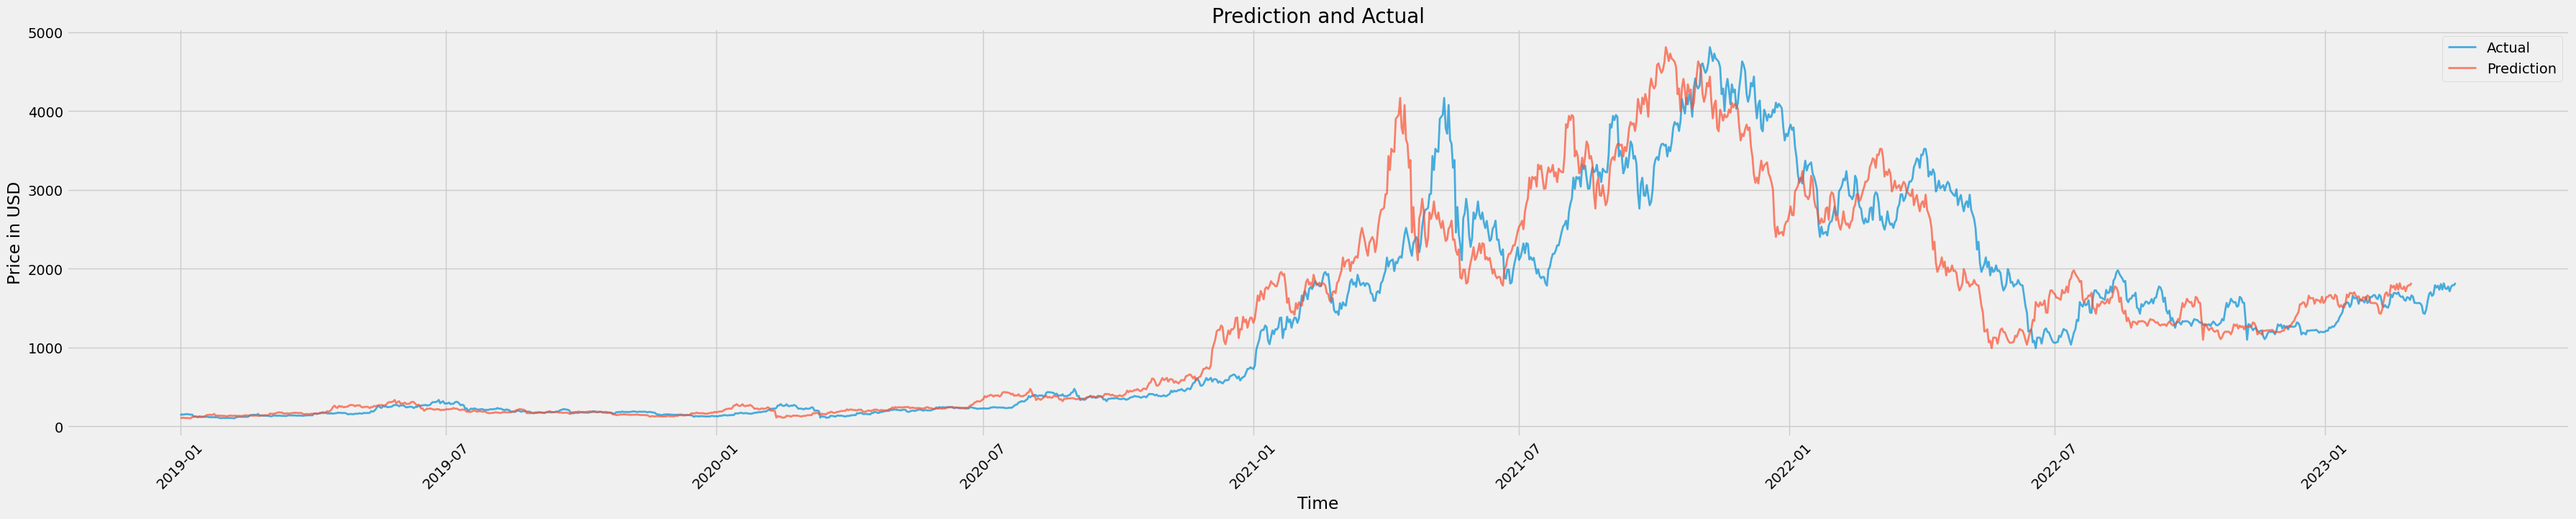

In [149]:
plt.figure(figsize=(40,7))
plt.grid(True)
plt.plot(data['Close'], label = 'Actual', lw=2,  alpha=.7)
plt.plot(data['30_Day_Price_Forecast'], label = 'Prediction', lw=2,  alpha=.7)
plt.title('Prediction and Actual')
plt.ylabel('Price in USD')
plt.xlabel('Time')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [150]:
X = np.array(data[['Close']])
X = X[:data.shape[0] - future_day]
print(X)

[[ 140.819412]
 [ 155.047684]
 [ 149.13501 ]
 ...
 [1634.326416]
 [1605.895142]
 [1663.433716]]


In [151]:
Y = np.array(data[str(future_day)+'_Day_Price_Forecast'])
Y = Y[:- future_day]
print(Y)

[ 107.061012  107.609787  110.43026  ... 1793.001831 1792.737183
 1822.022095]


In [152]:
val = np.array(data[['Close']])
val = val[- future_day:]
val


array([[1647.319336],
       [1569.167603],
       [1566.92395 ],
       [1564.46875 ],
       [1567.398682],
       [1561.933105],
       [1534.088257],
       [1438.660767],
       [1429.158081],
       [1482.616699],
       [1590.292969],
       [1680.30896 ],
       [1703.50708 ],
       [1656.180542],
       [1677.215454],
       [1792.485107],
       [1761.659668],
       [1785.576538],
       [1735.321289],
       [1806.760742],
       [1737.717041],
       [1816.405151],
       [1752.0448  ],
       [1743.764771],
       [1775.676758],
       [1715.460815],
       [1772.785645],
       [1793.001831],
       [1792.737183],
       [1822.022095]])

In [153]:
#Split the data
#Chia tập dữ liệu thành tập train, test và predict theo tỷ lệ 7-1-2
X_train = X[:int(X.shape[0]*0.7)]
Y_train = Y[:int(Y.shape[0]*0.7)]

X_val = X[int(X.shape[0]*0.7):int(X.shape[0]*0.8)]
Y_val = Y[int(Y.shape[0]*0.7):int(Y.shape[0]*0.8)]

X_test = X[int(X.shape[0]*0.8):]
Y_test = Y[int(Y.shape[0]*0.8):]



In [154]:
len(X_test)

305

In [155]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

X_pred = scaler.transform(data[['Close']])

c:\APP\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [156]:
print(X_pred)

[[-0.68672216]
 [-0.67533724]
 [-0.68006834]
 ...
 [ 0.63529116]
 [ 0.6350794 ]
 [ 0.65851207]]


In [157]:

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
svr = SVR()
# Tạo dictionary chứa các giá trị hyperparameters để thử nghiệm
param_grid = {'C': [ 10, 25, 50, 75, 100],
              'gamma': [0.001, 0.01, 0.1, 1],
              'kernel': ['linear', 'poly', 'rbf']}

In [158]:
X_Grid = np.concatenate([X_train_scaled,X_val_scaled])
Y_Grid = np.concatenate([Y_train,Y_val])

In [159]:
# Tạo một đối tượng GridSearchCV với model là SVR, dictionary chứa các hyperparameters, và 5 fold cross validation
grid_search = GridSearchCV(svr, param_grid, refit=True, cv=8, verbose=5)



In [160]:
# Huấn luyện đối tượng GridSearchCV
grid_search.fit(X_Grid, Y_Grid)


Fitting 8 folds for each of 60 candidates, totalling 480 fits
[CV 1/8] END ..C=10, gamma=0.001, kernel=linear;, score=0.614 total time=   0.0s
[CV 2/8] END .C=10, gamma=0.001, kernel=linear;, score=-3.301 total time=   0.0s
[CV 3/8] END .C=10, gamma=0.001, kernel=linear;, score=-1.914 total time=   0.0s
[CV 4/8] END ..C=10, gamma=0.001, kernel=linear;, score=0.359 total time=   0.0s
[CV 5/8] END ..C=10, gamma=0.001, kernel=linear;, score=0.416 total time=   0.0s
[CV 6/8] END .C=10, gamma=0.001, kernel=linear;, score=-0.624 total time=   0.0s
[CV 7/8] END .C=10, gamma=0.001, kernel=linear;, score=-2.358 total time=   0.0s
[CV 8/8] END .C=10, gamma=0.001, kernel=linear;, score=-1.314 total time=   0.0s
[CV 1/8] END ..C=10, gamma=0.001, kernel=poly;, score=-48.729 total time=   0.0s
[CV 2/8] END .C=10, gamma=0.001, kernel=poly;, score=-148.676 total time=   0.0s
[CV 3/8] END .C=10, gamma=0.001, kernel=poly;, score=-100.729 total time=   0.0s
[CV 4/8] END ..C=10, gamma=0.001, kernel=poly;,

GridSearchCV(cv=8, estimator=SVR(),
             param_grid={'C': [10, 25, 50, 75, 100],
                         'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['linear', 'poly', 'rbf']},
             verbose=5)

In [161]:
# In ra bộ hyperparameters tốt nhất
best_para=grid_search.best_params_
kernel_best=best_para['kernel']
C_best=best_para['C']
gamma_best=best_para['gamma']
print(best_para)

{'C': 50, 'gamma': 0.001, 'kernel': 'linear'}


In [162]:
grid_search.best_score_


-0.9758430906642631

In [163]:
from sklearn.svm import SVR
svr_linear = SVR(kernel=kernel_best, C= C_best, gamma= gamma_best)
svr_linear.fit(X_train_scaled, Y_train)

SVR(C=50, gamma=0.001, kernel='linear')

In [164]:
svr_linear_confidence = svr_linear.score(X_train_scaled, Y_train)
print('svr_rbf accuracy: ', svr_linear_confidence)

svr_rbf accuracy:  0.9071377416379465


In [165]:
from sklearn.metrics import mean_squared_error
X_val_pred = svr_linear.predict(X_val_scaled)
val_mse = mean_squared_error(Y_val, X_val_pred)
#val_rmse = np.sqrt(val_mse)
print("RMSE:", val_mse)

RMSE: 607821.8329367732


In [166]:
from sklearn.metrics import mean_absolute_percentage_error

# Dự đoán giá trị của tập test bằng model SVR
X_val_pred = svr_linear.predict(X_val_scaled)

# Tính toán giá trị MAPE
mape = mean_absolute_percentage_error(Y_val, X_val_pred)
print("MAPE:", mape)

MAPE: 0.2500473102914954


In [167]:
X_test_pred = svr_linear.predict(X_test_scaled)
print(X_test_pred)

[2914.40554283 2944.71127551 2869.15303178 3029.77411828 2834.13716545
 2778.71238342 2718.53205967 2597.29290727 2319.28750294 2419.52267339
 2142.15824516 2029.32575    2083.2004891  2125.97567584 2217.3731711
 2091.69073002 2160.86080286 1983.29079595 2087.20452687 2028.93140946
 2042.42407803 2112.58405638 2040.03632612 2046.98662932 2012.08141757
 1868.071298   1787.34558088 1821.08985061 1876.36730067 2064.82864832
 2009.526623   1888.15910124 1898.97272236 1838.60314859 1865.71685509
 1869.39129805 1924.66413188 1878.42895086 1857.50306461 1853.67455286
 1726.14952548 1587.79678097 1501.49477784 1255.57481797 1262.81042899
 1284.82727087 1115.71644218 1134.91775793 1039.99483589 1176.95865475
 1176.94430837 1174.06453522 1099.04933652 1193.03443661 1278.32582509
 1295.29270862 1250.71934825 1244.4332239  1194.2531382  1147.61525796
 1115.27506966 1107.57812605 1114.4717918  1121.88529981 1200.87534378
 1183.99441386 1237.5792289  1289.31060536 1273.8920172  1268.24262574
 1218.5

In [168]:
print(Y_test)

[1942.328003 1823.569336 1834.150513 1775.078613 1801.609497 1805.204956
 1859.289673 1814.04834  1793.572266 1789.82605  1665.042236 1529.663452
 1445.216553 1204.582764 1211.662842 1233.206421 1067.730713 1086.519287
  993.63678  1127.656494 1127.642456 1124.824585 1051.421875 1143.386719
 1226.844727 1243.446899 1199.831665 1193.680664 1144.579224 1098.943848
 1067.298828 1059.767334 1066.512817 1073.766968 1151.059082 1134.541016
 1186.973999 1237.593384 1222.506226 1216.978271 1168.401611 1097.236572
 1038.19165  1113.587158 1191.526245 1233.12915  1352.626465 1338.635742
 1578.717896 1542.97522  1520.200684 1576.749512 1537.405151 1549.297485
 1599.476685 1445.383423 1441.806763 1636.232666 1725.46814  1727.406982
 1695.969482 1681.517334 1635.195801 1632.945435 1618.874512 1608.205811
 1732.254639 1691.658081 1699.35083  1775.516113 1703.025024 1851.742676
 1881.224121 1957.24646  1981.336548 1936.802002 1904.228149 1878.139404
 1832.999634 1847.007813 1612.987305 1577.003784 16

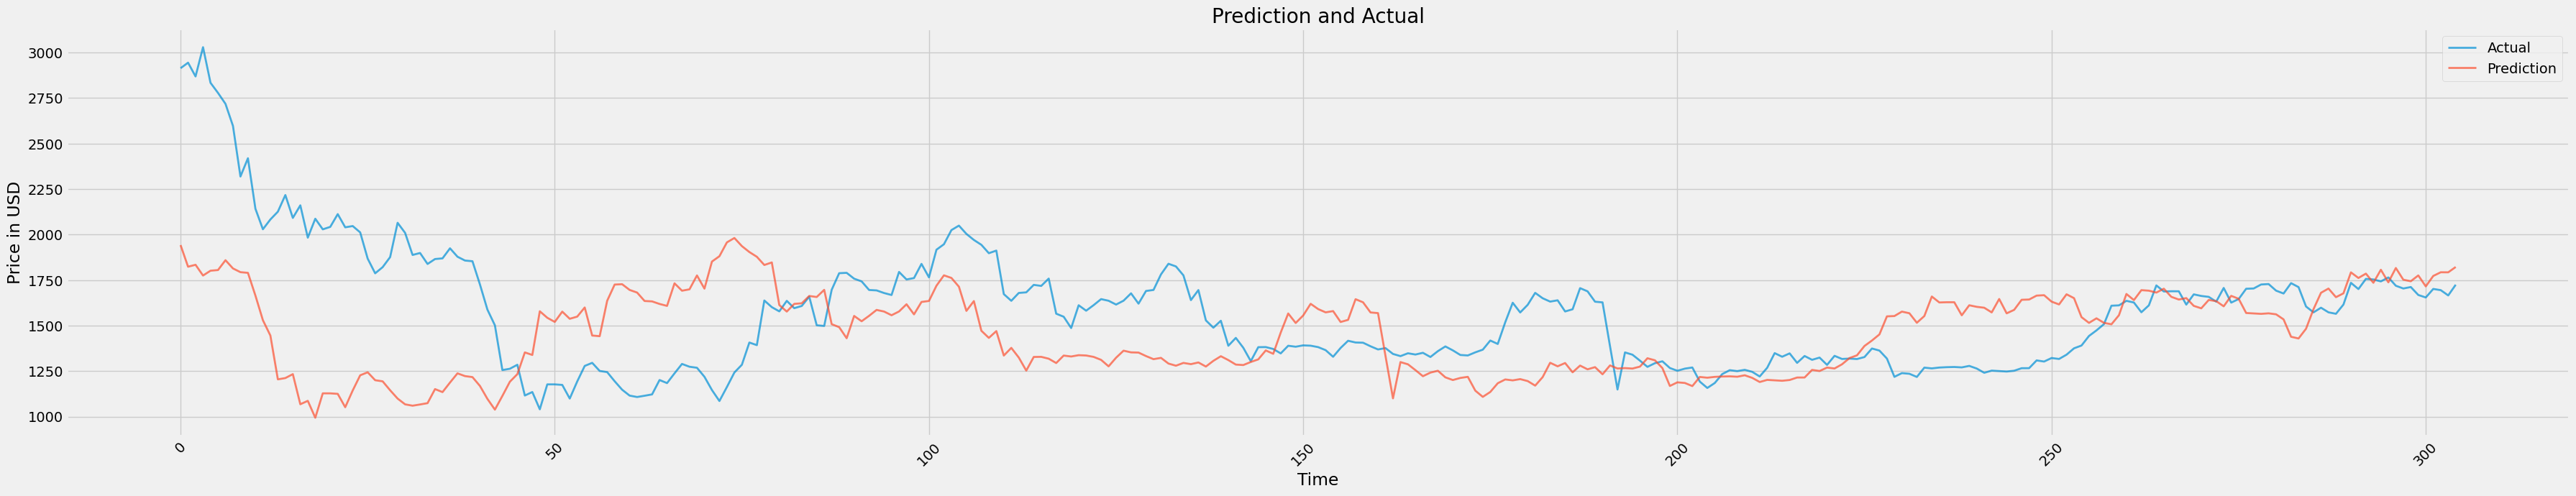

In [169]:
plt.figure(figsize=(40,7))
plt.grid(True)

plt.plot(X_test_pred, label = 'Actual', lw=2,  alpha=.7)
plt.plot(Y_test, label = 'Prediction', lw=2,  alpha=.7)
plt.title('Prediction and Actual')
plt.ylabel('Price in USD')
plt.xlabel('Time')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [170]:
from sklearn.metrics import mean_squared_error
val_mse = mean_squared_error(Y_test, X_test_pred)
val_rmse = np.sqrt(val_mse)
print("RMSE:", val_rmse)

RMSE: 404.4332209715695


In [171]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(Y_test, X_test_pred, squared= False)
rmse

404.4332209715695

In [172]:
from sklearn.metrics import mean_absolute_percentage_error

# Tính toán giá trị MAPE
mape = mean_absolute_percentage_error(Y_test, X_test_pred)
print("MAPE:", mape)

MAPE: 0.2173240452795026


Dự đoán

In [173]:
X_test_pred = svr_linear.predict(X_test_scaled)
print(X_test_pred)

[2914.40554283 2944.71127551 2869.15303178 3029.77411828 2834.13716545
 2778.71238342 2718.53205967 2597.29290727 2319.28750294 2419.52267339
 2142.15824516 2029.32575    2083.2004891  2125.97567584 2217.3731711
 2091.69073002 2160.86080286 1983.29079595 2087.20452687 2028.93140946
 2042.42407803 2112.58405638 2040.03632612 2046.98662932 2012.08141757
 1868.071298   1787.34558088 1821.08985061 1876.36730067 2064.82864832
 2009.526623   1888.15910124 1898.97272236 1838.60314859 1865.71685509
 1869.39129805 1924.66413188 1878.42895086 1857.50306461 1853.67455286
 1726.14952548 1587.79678097 1501.49477784 1255.57481797 1262.81042899
 1284.82727087 1115.71644218 1134.91775793 1039.99483589 1176.95865475
 1176.94430837 1174.06453522 1099.04933652 1193.03443661 1278.32582509
 1295.29270862 1250.71934825 1244.4332239  1194.2531382  1147.61525796
 1115.27506966 1107.57812605 1114.4717918  1121.88529981 1200.87534378
 1183.99441386 1237.5792289  1289.31060536 1273.8920172  1268.24262574
 1218.5

In [174]:
Y_test

array([1942.328003, 1823.569336, 1834.150513, 1775.078613, 1801.609497,
       1805.204956, 1859.289673, 1814.04834 , 1793.572266, 1789.82605 ,
       1665.042236, 1529.663452, 1445.216553, 1204.582764, 1211.662842,
       1233.206421, 1067.730713, 1086.519287,  993.63678 , 1127.656494,
       1127.642456, 1124.824585, 1051.421875, 1143.386719, 1226.844727,
       1243.446899, 1199.831665, 1193.680664, 1144.579224, 1098.943848,
       1067.298828, 1059.767334, 1066.512817, 1073.766968, 1151.059082,
       1134.541016, 1186.973999, 1237.593384, 1222.506226, 1216.978271,
       1168.401611, 1097.236572, 1038.19165 , 1113.587158, 1191.526245,
       1233.12915 , 1352.626465, 1338.635742, 1578.717896, 1542.97522 ,
       1520.200684, 1576.749512, 1537.405151, 1549.297485, 1599.476685,
       1445.383423, 1441.806763, 1636.232666, 1725.46814 , 1727.406982,
       1695.969482, 1681.517334, 1635.195801, 1632.945435, 1618.874512,
       1608.205811, 1732.254639, 1691.658081, 1699.35083 , 1775.

In [175]:
Y_test_pred= Y_test.reshape(-1,1)
print(Y_test_pred.shape)
Y_test_pred

(305, 1)


array([[1942.328003],
       [1823.569336],
       [1834.150513],
       [1775.078613],
       [1801.609497],
       [1805.204956],
       [1859.289673],
       [1814.04834 ],
       [1793.572266],
       [1789.82605 ],
       [1665.042236],
       [1529.663452],
       [1445.216553],
       [1204.582764],
       [1211.662842],
       [1233.206421],
       [1067.730713],
       [1086.519287],
       [ 993.63678 ],
       [1127.656494],
       [1127.642456],
       [1124.824585],
       [1051.421875],
       [1143.386719],
       [1226.844727],
       [1243.446899],
       [1199.831665],
       [1193.680664],
       [1144.579224],
       [1098.943848],
       [1067.298828],
       [1059.767334],
       [1066.512817],
       [1073.766968],
       [1151.059082],
       [1134.541016],
       [1186.973999],
       [1237.593384],
       [1222.506226],
       [1216.978271],
       [1168.401611],
       [1097.236572],
       [1038.19165 ],
       [1113.587158],
       [1191.526245],
       [12

In [176]:
Y_test_scaled = scaler.transform(Y_test_pred)

In [177]:
last_30_days = svr_linear.predict(X_pred[-future_day:])
test = last_30_days
last_30_days = last_30_days[-future_day:]
print(last_30_days)

[1708.03729413 1628.16874731 1625.87580641 1623.36667131 1626.36096718
 1620.77532403 1592.31878876 1494.7949763  1485.08353814 1539.71651902
 1649.75818901 1741.75162429 1765.45935363 1717.09316044 1738.59016108
 1856.39202322 1824.88942023 1849.33168885 1797.97244762 1870.98126109
 1800.42082878 1880.83753557 1815.06333569 1806.6014135  1839.21443346
 1777.67568469 1836.25980935 1856.92009846 1856.64963675 1886.57787091]


In [178]:
print(X.shape)

(1521, 1)


In [179]:
last_30_days

array([1708.03729413, 1628.16874731, 1625.87580641, 1623.36667131,
       1626.36096718, 1620.77532403, 1592.31878876, 1494.7949763 ,
       1485.08353814, 1539.71651902, 1649.75818901, 1741.75162429,
       1765.45935363, 1717.09316044, 1738.59016108, 1856.39202322,
       1824.88942023, 1849.33168885, 1797.97244762, 1870.98126109,
       1800.42082878, 1880.83753557, 1815.06333569, 1806.6014135 ,
       1839.21443346, 1777.67568469, 1836.25980935, 1856.92009846,
       1856.64963675, 1886.57787091])

In [180]:
X_train_pred = svr_linear.predict(X_train_scaled)

In [198]:
# Tạo biểu đồ
actual = np.arange(len(data['Close']))
Predict = np.arange(len(data['Close']), len(data['Close']) + len(last_30_days))

#index X_train
index_X_train = np.arange(len(X_train_pred))

#index X_val
index_X_val = np.arange(len(X_train_pred), len(X_train_pred) + len(X_val_pred))

#index X_test
index_X_test = np.arange(len(X_train_pred) + len(X_val_pred),len(X_train_pred) + len(X_val_pred) + len(X_test_pred) )

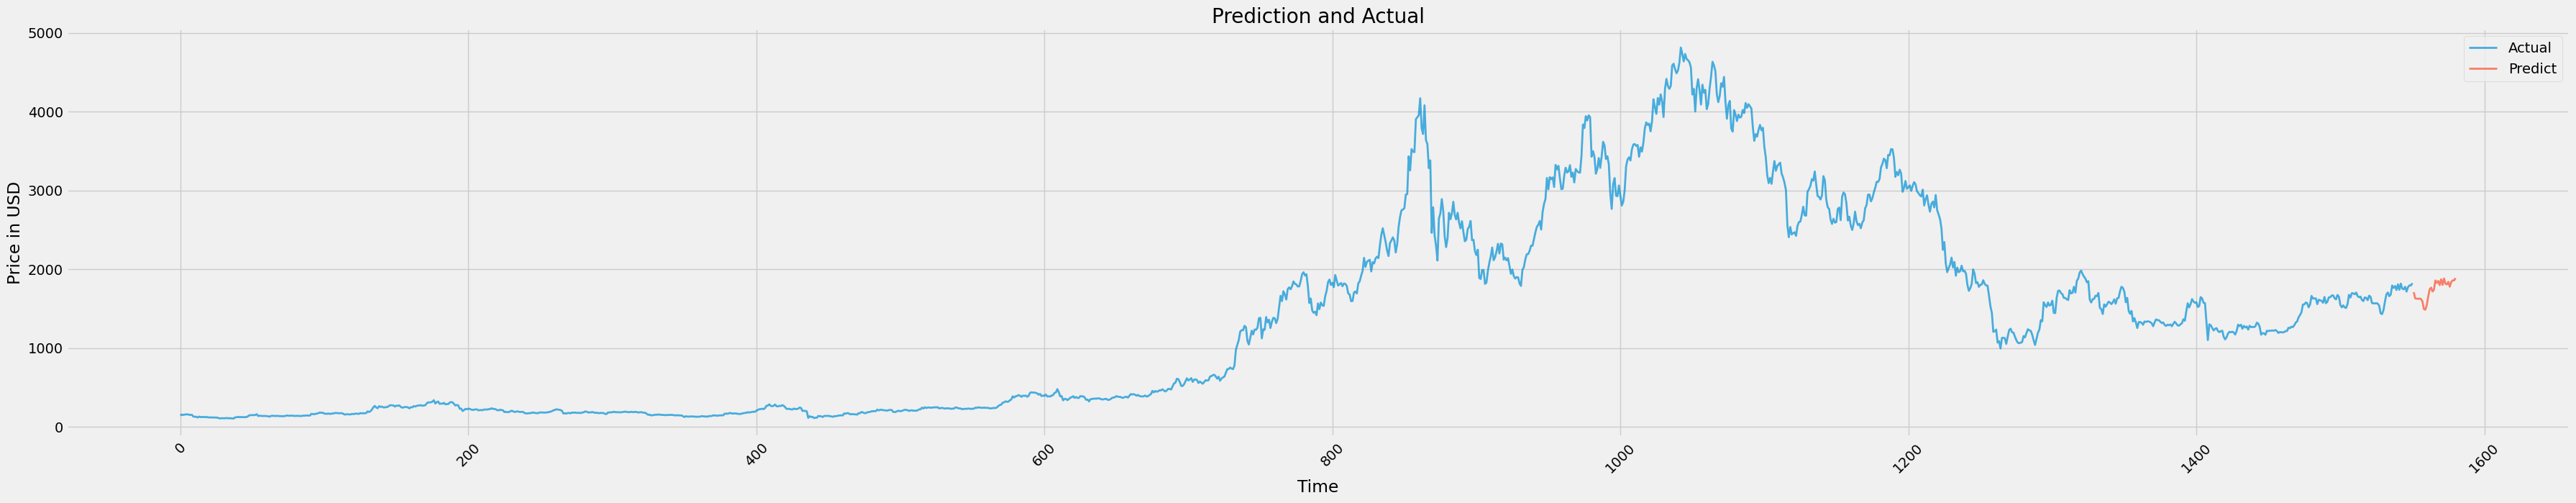

In [200]:
X_test_pred = X_test_pred.reshape(-1, 1)
Y_train = Y_train.reshape(-1, 1)
Y_val = Y_val.reshape(-1, 1)

plt.figure(figsize=(40,7))
plt.grid(True)

last_30_days = last_30_days.reshape(-1, 1)
aX_pred = np.concatenate([X,last_30_days])
#plt.plot(X_test_pred, label = 'Actual', lw=2,  alpha=.7)
plt.plot(actual, data['Close'], label = 'Actual', lw=2,  alpha=.7 )
plt.plot(Predict, last_30_days, label = 'Predict', lw=2,  alpha=.7 )


plt.title('Prediction and Actual')
plt.ylabel('Price in USD')
plt.xlabel('Time')
plt.legend()
plt.xticks(rotation=45)
plt.show()

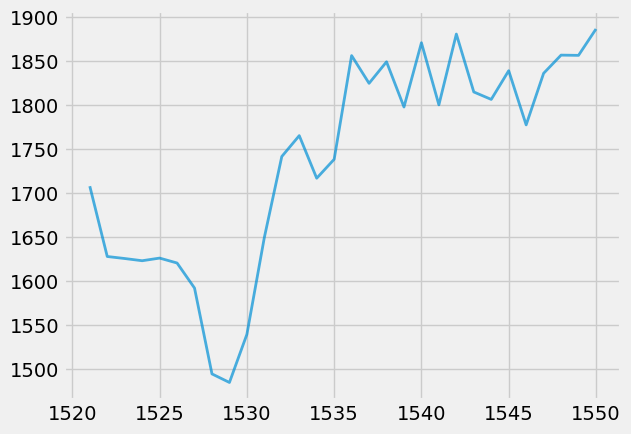

In [183]:
plt.plot(Predict, last_30_days, label = 'Predict', lw=2,  alpha=.7 )


In [184]:
last_30_days


array([[1708.03729413],
       [1628.16874731],
       [1625.87580641],
       [1623.36667131],
       [1626.36096718],
       [1620.77532403],
       [1592.31878876],
       [1494.7949763 ],
       [1485.08353814],
       [1539.71651902],
       [1649.75818901],
       [1741.75162429],
       [1765.45935363],
       [1717.09316044],
       [1738.59016108],
       [1856.39202322],
       [1824.88942023],
       [1849.33168885],
       [1797.97244762],
       [1870.98126109],
       [1800.42082878],
       [1880.83753557],
       [1815.06333569],
       [1806.6014135 ],
       [1839.21443346],
       [1777.67568469],
       [1836.25980935],
       [1856.92009846],
       [1856.64963675],
       [1886.57787091]])